# A Modern Approach to Hypothesis Testing

In [1]:
import numpy as np
x = np.linspace(0,1, 1000)
np.random.seed(2)
from scipy.stats import beta, binom
from scipy.stats import bernoulli as coin
import matplotlib.pyplot as plt

## What is wrong with the old approach?
* Requires pre-determined, fixed sample size
* Requires arbitrary choice of $\alpha$ and power
* May require assumptions of effect size and variance
* Often results in no decision
* Asymmetrical - no decision will favor $H_o$ which may be arbitrary
* Monitoring the results is prohibited
* Altering the experiment design is **forbidden**

## What would we like to see in a modern approach?

* Use as much or as little data as available
* Monitor results continuously
* Adapt experiment design based on latest results
* Automatically adjust to effect size and variance as they are learned
* Stop the experiment whenever or continue as long as desired

# The Question of Sample Size (Traditional Approach):


![](images/power.png)

$$\Large n > \left (\left(Z_{(1-\beta)}-Z_\alpha \right )\frac {s}{\mu_b-\mu_a}\right )^2$$

* Two values that are unknown
* Two values that are made up
* Two assumptions that might not be true

  # The Question of Sample Size (Modern Approach):
  
* Start with zero
* Next comes one
* After that is two
* See what happens

# How did it come to this?

### You have a fair coin ($p_{\text{ heads}}=0.5$). You flip it $N$ times. 
### What is the probability of observing $x$ heads and $N-x$ tails?

$$\Large P_x = \binom{n}{x}p^{x}(1-p)^{n-x}$$

### Problems:
* $p_{\text{ heads}}$ can only be known at $Time = \infty$
* $x$ and $N-x$ are very easy to observe

### We start by assuming we know something we can't possible know and try to calculate something that we could very easily observe. 

# That's backwards!

# Turn it around:

### You have flipped a coin $N$ times and observed $H$ heads and $N-H$ tails.

### What is the *likelihood* this coin is fair ($p_{\text{ heads}} = 0.5$)?
### What is the *likelihood* that $p$ is another value in the range $(0..1)$?

## We start with what we can observe directly and use that to calculate what we'd like to know

# This is the way the world actually works

# The Beta Function

$$\Large f(x;\alpha, \beta) = \frac {x^{\alpha-1}(1-x)^{\beta -1}}{\int_0^1{\mu^{\alpha - 1}(1-\mu)^{\beta-1}d\mu}}$$

$\alpha$: Number of successes

$\beta$: Number of failures

$x$: all possible values of $P = [0..1]$

## The Beta function gives us the likelihood of the probabilities based on the data available


# Example:
## We flip a fair coin 5 times

In [2]:
''' Coin is fair'''
p = 0.5

N = 5

flips = coin(p).rvs(N)
np.array(['Tails','Heads'])[flips]


array(['Tails', 'Tails', 'Heads', 'Tails', 'Tails'], dtype='<U5')

In [3]:
def plot_likelihoods(p, N):
    flips = coin(p).rvs(N)
    a = flips.sum() if np.std(flips)!=0 else 1+flips.sum()
    b = N-flips.sum() if np.std(flips)!=0 else 1+N-flips.sum()
    beta1 = beta(a,b)
    plt.plot(x, beta1.pdf(x))
    plt.xlabel('Probability of Heads')
    plt.ylabel('Likelihood')
    [plt.axvline(beta1.ppf(i), color='red', label=f'{100*i}% credibile limit') for i in [.025,.975]]
    plt.scatter(beta1.mean(), plt.ylim()[1]/2, color='red', s=100, label = f'Best estimate of P: {beta1.mean():.2f}')
    plt.title('Range of P values that could credibly produce the observed evidence')
    plt.axvline(p, color='green', label='True value of P')
    [plt.annotate(f'{i:.3f}', (i, plt.ylim()[1]/j)) for i,j in zip(beta1.ppf([.025,.975]), (4,6))]
    plt.annotate(f'Tails: {N-flips.sum()}\n\nHeads: {flips.sum()}', (p, plt.ylim()[1]*.5))
    plt.legend(loc=[1.1,0]);
    

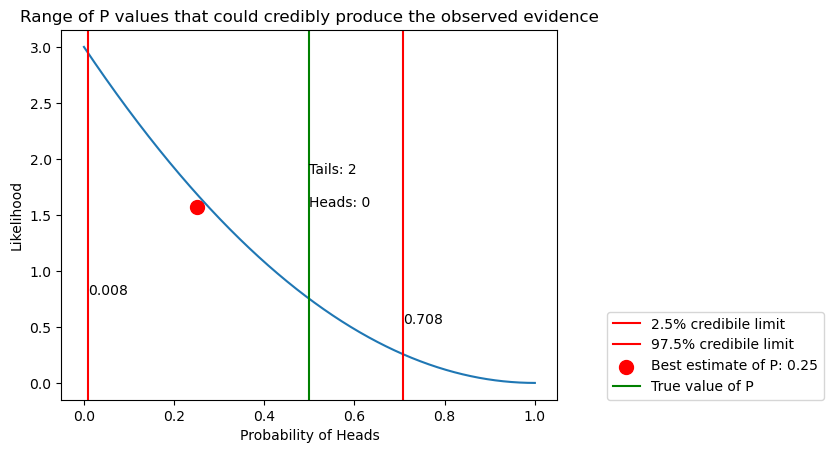

In [4]:
plot_likelihoods(p, 2)

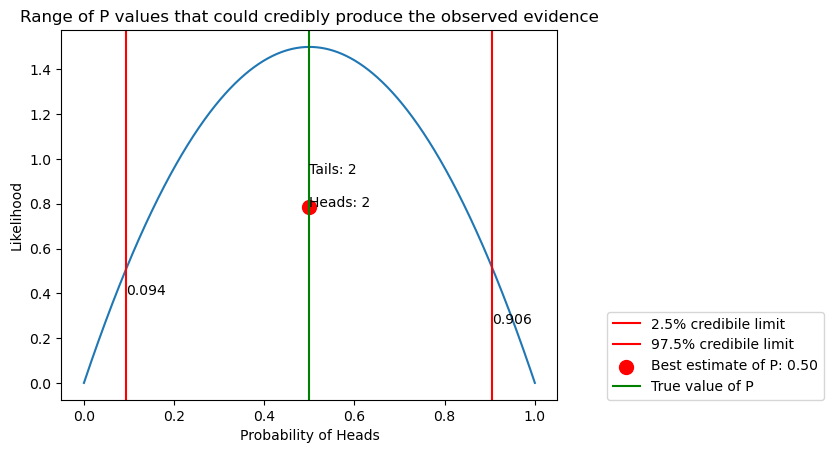

In [5]:
plot_likelihoods(p, 4)

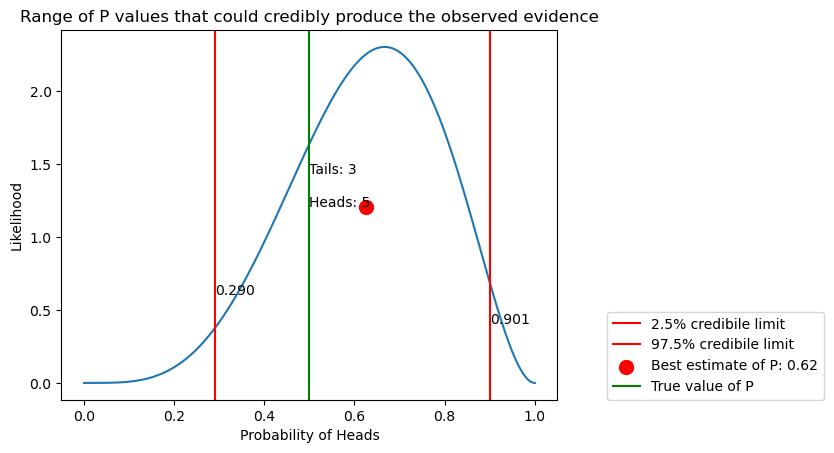

In [6]:
plot_likelihoods(p, 8)

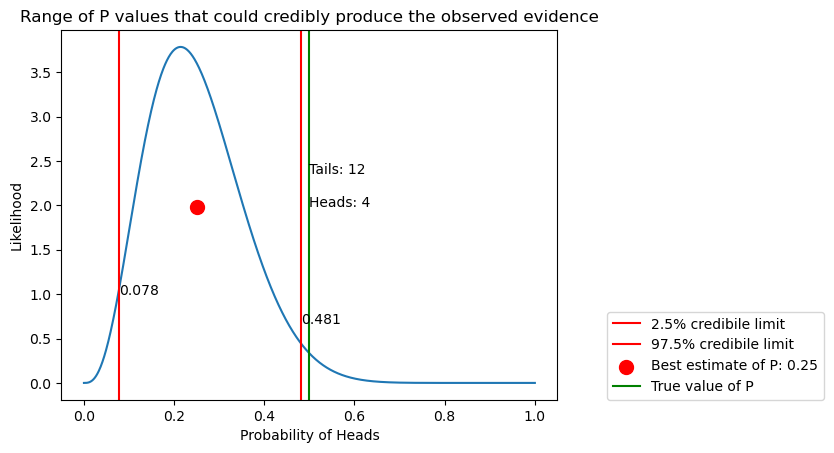

In [7]:
plot_likelihoods(p, 16)

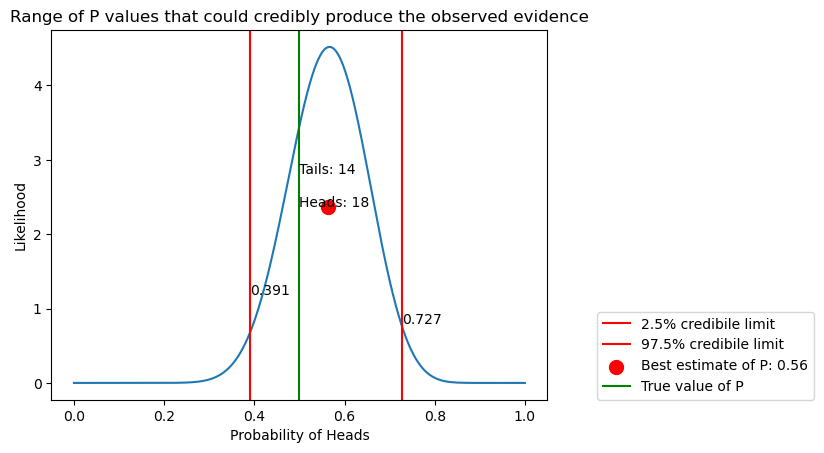

In [8]:
plot_likelihoods(p, 32)

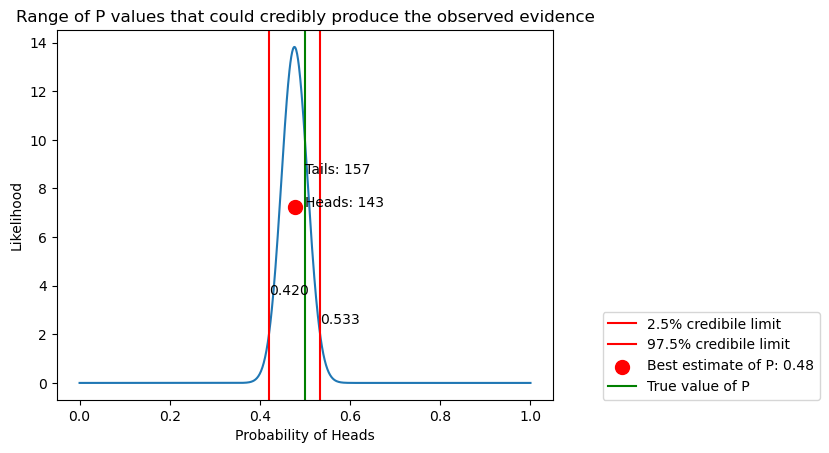

In [9]:
plot_likelihoods(p, 300)

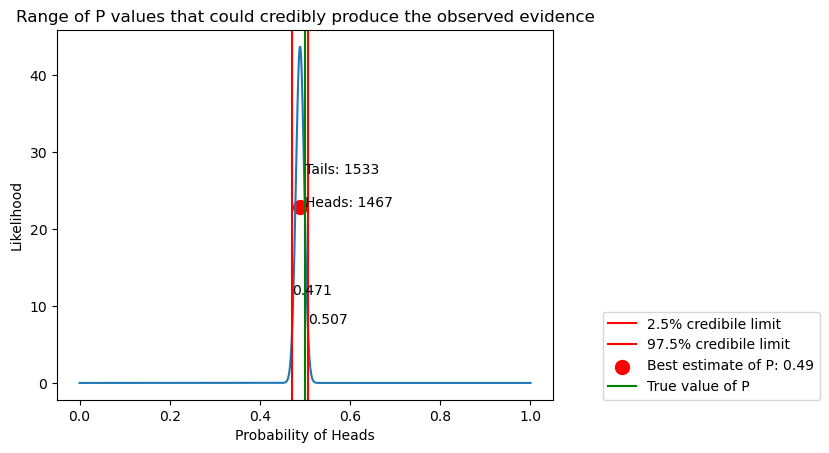

In [10]:
plot_likelihoods(p, 3000)

# Conclusion:

## We never really know the true value of $\large P$
## We only know a range of values which $\large P$ might be
## We can estimate the range of credibile values of $\large P$ for *any* sample size
## More samples results in narrower credible range

# Benefit:
## We can run an experiment with *any* sample size!
## We can monitor the results as we go!
## We can change the sample size as we go!

# Using the $\beta$ Function to Compare Results Retrospectively
## (i.e, after the data has been collected)

Suppose we want to compare two processes.
* Process A had 25 successes and 75 failures
* Process B had 11 success and 34 failures

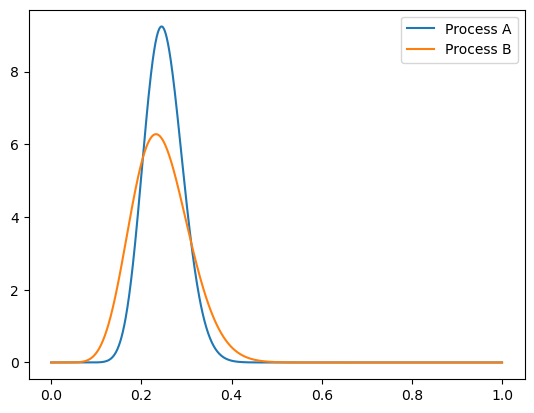

In [11]:
A = beta(25, 75)
B = beta(11,34)
plt.plot(x, A.pdf(x), label='Process A')
plt.plot(x, B.pdf(x), label='Process B')
plt.legend();

# Realization

## A *realization* is a version of reality that might be true


## A realization is a sample from the distribution (or distributions) that describes all the possible versions of reality.

## All realizations are equally likely to be true

## They are grouped around the "truest" version or reality

# First Realization:

## One sample from A and one sample from B:

In [12]:
A.rvs(), B.rvs()

(0.19836724046698023, 0.25862025308752046)

# Make a scatter plot of 50 realizations:

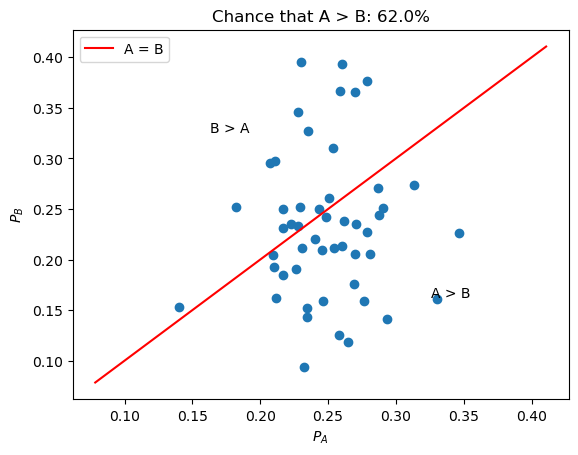

In [13]:
plt.scatter(a:=A.rvs(50), b:=B.rvs(50));
plt.xlabel('$P_A$')
plt.ylabel('$P_B$')
lo = min(plt.xlim()+plt.ylim())
hi = max(plt.xlim()+plt.ylim())
plt.plot([lo,hi],[lo,hi], color='red', label='A = B')
plt.annotate('B > A', ((lo+hi)/3,2*(lo+hi)/3))
plt.annotate('A > B', (2*(lo+hi)/3, (lo+hi)/3))
plt.legend()
plt.title(f'Chance that A > B: {100*(a>b).mean()}%');

# Which one is better?

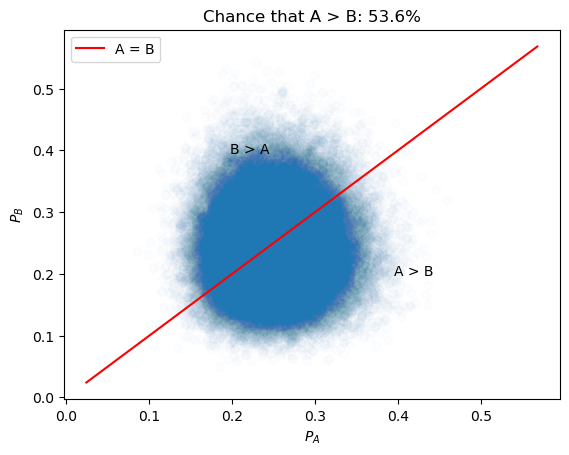

In [14]:
plt.scatter(a:=A.rvs(100000), b:=B.rvs(100000), alpha=.01);
plt.xlabel('$P_A$')
plt.ylabel('$P_B$')
lo = min(plt.xlim()+plt.ylim())
hi = max(plt.xlim()+plt.ylim())
plt.plot([lo,hi],[lo,hi], color='red', label='A = B')
plt.annotate('B > A', ((lo+hi)/3,2*(lo+hi)/3))
plt.annotate('A > B', (2*(lo+hi)/3, (lo+hi)/3))
plt.legend()
plt.title(f'Chance that A > B: {100*(a>b).mean():.1f}%');

# Using the Beta Distribution to Steer the Experiment
## (i.e, adjust sample size as results come in)

## Suppose we want to compare two processes.

We don't know this (yet): 
* Process A has 3% success rate
* Process B has 4% success rate

## Procedure:
1. Randomly select a process to test (A or B)
2. Record the result as a success or failure of that process
3. Create a Beta distribution for each process
4. Sample one value from each Beta distribution.
5. Whichever sample is larger is the next process to use

In [15]:
'''Probability of success for process A and B'''
A, B = coin(0.03), coin(0.04)

'''Initial Results'''
results = {'A':{'success':1,
               'failure':1},
          'B':{'success':1,
              'failure':1}}



# First Trial:

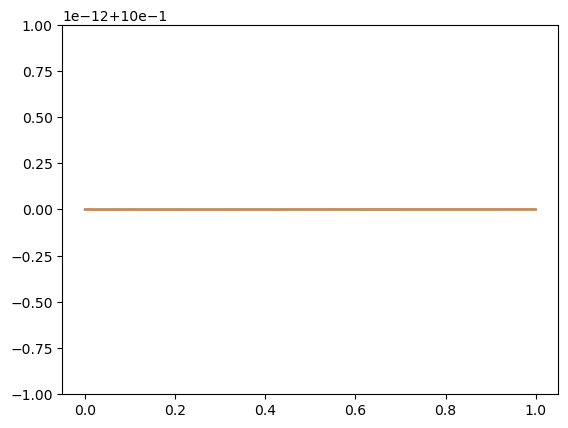

In [16]:
A_beta = beta(*results['A'].values())
B_beta = beta(*results['B'].values())
[plt.plot(x,i.pdf(x)) for i in (A_beta, B_beta)];


In [17]:
def run_experiment(results, plot=False):
    
    '''Make a Beta Distribution for A and B'''
    
    A_beta = beta(*results['A'].values())
    B_beta = beta(*results['B'].values())
    
    '''Decide which process to use'''
    
    process_to_use = 'A' if A_beta.rvs()>B_beta.rvs() else 'B'
    print(f'Process to use: {process_to_use}')
    
    '''Run the trial'''
    result = A.rvs() if process_to_use == 'A' else B.rvs()
    print(f'result: {result}')
    
    '''Update the tally of results'''
    results[process_to_use]['success'] += result
    results[process_to_use]['failure'] += 1-result
    
    '''Update the Beta Distributions with the new result'''
    
    A_beta = beta(*results['A'].values())
    B_beta = beta(*results['B'].values())
    
    if plot:
        plt.plot(x, A_beta.pdf(x), label='A')
        plt.plot(x, B_beta.pdf(x), label='B')
        [plt.annotate(f'''{i}: N = {sum(results[i].values())}\
         P = {results[i]["success"]/sum(results[i].values()):.3f}''', (.5, plt.ylim()[1]/j)) 
        for j, i in enumerate('AB',2)]
        plt.title(f'Likelihood that A is better than B: {100*(A_beta.rvs(10000)>B_beta.rvs(10000)).mean():.1f}%')

        plt.legend();
    
    
        
    return results


Process to use: B
result: 0


{'A': {'success': 1, 'failure': 1}, 'B': {'success': 1, 'failure': 2}}

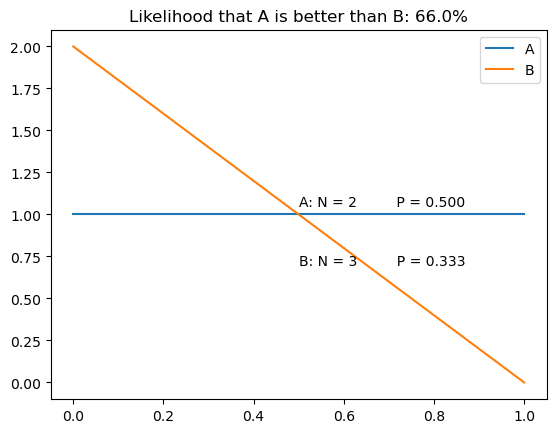

In [18]:
run_experiment(results, True)

In [19]:
[run_experiment(results) for _ in range(100)]

Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 1
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
re

[{'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'failure': 53}, 'B': {'success': 3, 'failure': 45}},
 {'A': {'success': 4, 'fa

Process to use: A
result: 0


{'A': {'success': 4, 'failure': 54}, 'B': {'success': 3, 'failure': 45}}

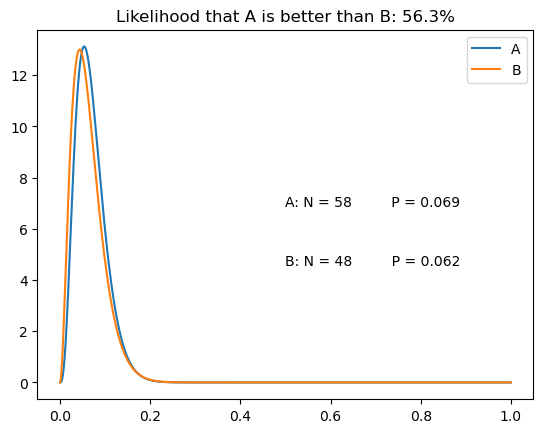

In [20]:
run_experiment(results, True)

In [21]:
[run_experiment(results) for _ in range(200)]

Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
re

[{'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},
 {'A': {'success': 9, 'failure': 181}, 'B': {'success': 4, 'failure': 112}},

Process to use: A
result: 0


{'A': {'success': 9, 'failure': 182}, 'B': {'success': 4, 'failure': 112}}

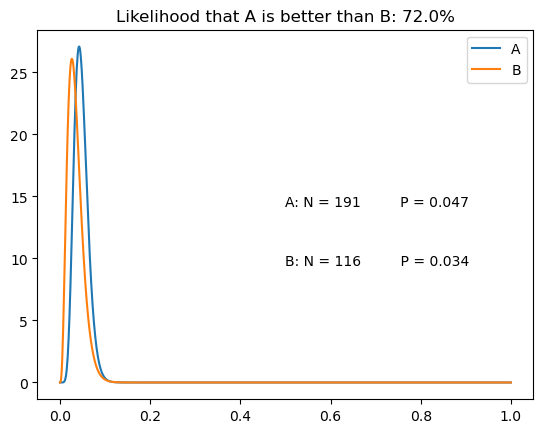

In [22]:
run_experiment(results, True)

In [23]:
[run_experiment(results) for _ in range(5000)]

Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 1
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
re

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

[{'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 4036}},
 {'A': {'success': 29, 'failure': 1096},
  'B': {'success': 146, 'failure': 

Process to use: B
result: 0


{'A': {'success': 29, 'failure': 1096}, 'B': {'success': 146, 'failure': 4037}}

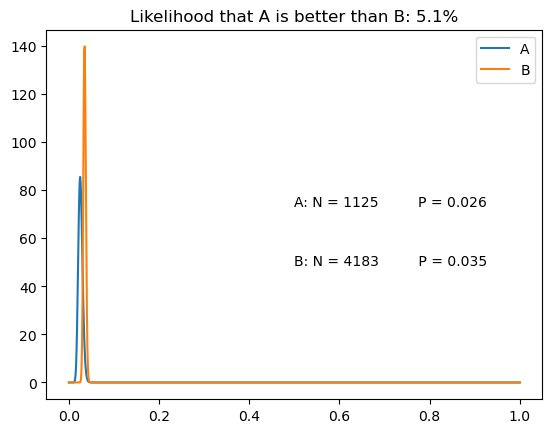

In [24]:
run_experiment(results, True)

In [25]:
[run_experiment(results) for _ in range(10000)]

Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: A
re

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
re

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: A
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 1
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to use: B
result: 0
Process to

[{'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 'failure': 12980}},
 {'A': {'success': 55, 'failure': 1767},
  'B': {'success': 506, 

Process to use: B
result: 0


{'A': {'success': 55, 'failure': 1767},
 'B': {'success': 506, 'failure': 12981}}

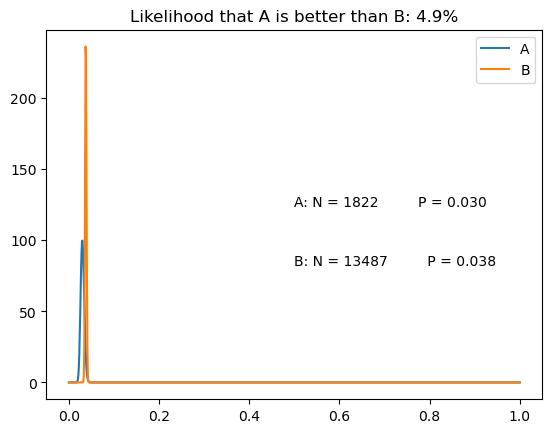

In [26]:
run_experiment(results, True)

# Notice:

## The better process *automatically* gets more trials!

# Overall Results:

In [27]:
Total_trials = sum([sum(i.values()) for i in results.values()])
total_success = results['A']['success'] + results['B']['success']

Total_trials, total_success, f'{100*total_success/Total_trials:.1f}%'

(15309, 561, '3.7%')

# If we used the traditional 50-50 split:

In [28]:
fifty_fifty_success = A.rvs(Total_trials//2).sum() + B.rvs(Total_trials//2).sum()
fifty_fifty_success, f'{100*fifty_fifty_success/Total_trials:.1f}%'

(490, '3.2%')

In [29]:
f'Improvement: {100*(total_success/fifty_fifty_success-1):.1f}%'

'Improvement: 14.5%'